# A project to analyze technology trends using data obtained from APIs, Web Scraping and Survey data

We scrape data of  the **name of the programming language** and **average annual salary** from the <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html">URL</a>  provided by skills network labs. <br> 
we there after write the scraped data into a csv file

We then use the <a href="https://developer.adzuna.com/">Adzuna API</a> to scrape data of number of technology jobs in some selected US cities and store them in an excel file 

We also use the Stack Overflow Developer Survey 2019 data to create a dashboard with IBM Cognos visualization tool to visualize and present our analysis<br>
Note:This randomised subset contains around 1/10th of the original data set.<br> Our Conclusions drawn after analyzing this subset may not reflect the real world scenario<br>
To access this dataset from IBM cloud <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv">Click_HERE</a>

In [1]:
#Importation of libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading of data api stored in excel
tech_data= pd.read_excel("C:/Users/PROFFESSOR/Desktop/DATA ANALYTICS/IBM CAPESTONE PROJECT/WEEK1/job_counts_by_technology_and_city1.xlsx")
#loading of scraped website
popular_languages=pd.read_csv("C:/Users/PROFFESSOR/Desktop/DATA ANALYTICS/IBM CAPESTONE PROJECT/WEEK1/popular-languages.csv")

In [3]:
#snapshot of data
tech_data

,City,Java,Python,MySQL,C++,C#,Ruby,JavaScript,PHP,Swift,C,SQL,SQL Server,PostgreSQL,MongoDB,Scala,Oracle,Go
0,New York,922,462,8.0,162,166,23.0,186,14,36,173,406,86,6.0,26,22,116,444
1,Los Angeles,135,52,8.0,61,44,5.0,47,4,3,60,91,23,4.0,13,6,37,184
2,Chicago,239,125,12.0,41,92,8.0,68,5,13,75,171,37,NaN,19,3,43,210
3,Houston,201,113,4.0,29,71,NaN,42,4,5,84,174,41,2.0,10,4,53,228
4,Phoenix,254,52,5.0,26,45,4.0,44,4,4,59,126,17,1.0,10,4,75,161
5,Philadelphia,183,97,3.0,54,27,3.0,58,7,8,73,56,15,3.0,8,2,35,129
6,San Antonio,103,10,NaN,18,17,NaN,13,2,4,11,32,9,1.0,3,2,13,15
7,San Diego,200,112,6.0,68,36,6.0,45,2,14,95,40,3,2.0,9,5,10,105
8,Dallas,523,111,10.0,76,95,10.0,99,11,13,68,227,32,2.0,25,12,64,216
9,San Jose,199,138,8.0,151,25,4.0,36,5,18,156,63,10,2.0,8,6,27,122


In [4]:
#preproccessing of data from api
tech_data = tech_data.set_index("City").T
tech_data.head()

City,New York,Los Angeles,Chicago,Houston,Phoenix,Philadelphia,San Antonio,San Diego,Dallas,San Jose
Java,922.0,135.0,239.0,201.0,254.0,183.0,103.0,200.0,523.0,199.0
Python,462.0,52.0,125.0,113.0,52.0,97.0,10.0,112.0,111.0,138.0
MySQL,8.0,8.0,12.0,4.0,5.0,3.0,NaN,6.0,10.0,8.0
C++,162.0,61.0,41.0,29.0,26.0,54.0,18.0,68.0,76.0,151.0
C#,166.0,44.0,92.0,71.0,45.0,27.0,17.0,36.0,95.0,25.0


In [5]:
# Set the first column of the old dataframe as the new index column
tech_data.rename_axis('Technology', inplace=True)

In [6]:
tech_data['Total'] = tech_data.sum(axis=1)
tech_data = tech_data.sort_values(by='Total', ascending=False)
tech_data=tech_data.fillna(0)
tech_data.head(17)

City,New York,Los Angeles,Chicago,Houston,Phoenix,Philadelphia,San Antonio,San Diego,Dallas,San Jose,Total
Technology,,,,,,,,,,,
Java,922.0,135.0,239.0,201.0,254.0,183.0,103.0,200.0,523.0,199.0,2959.0
Go,444.0,184.0,210.0,228.0,161.0,129.0,15.0,105.0,216.0,122.0,1814.0
SQL,406.0,91.0,171.0,174.0,126.0,56.0,32.0,40.0,227.0,63.0,1386.0
Python,462.0,52.0,125.0,113.0,52.0,97.0,10.0,112.0,111.0,138.0,1272.0
C,173.0,60.0,75.0,84.0,59.0,73.0,11.0,95.0,68.0,156.0,854.0
C++,162.0,61.0,41.0,29.0,26.0,54.0,18.0,68.0,76.0,151.0,686.0
JavaScript,186.0,47.0,68.0,42.0,44.0,58.0,13.0,45.0,99.0,36.0,638.0
C#,166.0,44.0,92.0,71.0,45.0,27.0,17.0,36.0,95.0,25.0,618.0
Oracle,116.0,37.0,43.0,53.0,75.0,35.0,13.0,10.0,64.0,27.0,473.0


In [7]:
tech_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Java to PostgreSQL
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   New York      17 non-null     float64
 1   Los Angeles   17 non-null     float64
 2   Chicago       17 non-null     float64
 3   Houston       17 non-null     float64
 4   Phoenix       17 non-null     float64
 5   Philadelphia  17 non-null     float64
 6   San Antonio   17 non-null     float64
 7   San Diego     17 non-null     float64
 8   Dallas        17 non-null     float64
 9   San Jose      17 non-null     float64
 10  Total         17 non-null     float64
dtypes: float64(11)
memory usage: 1.6+ KB


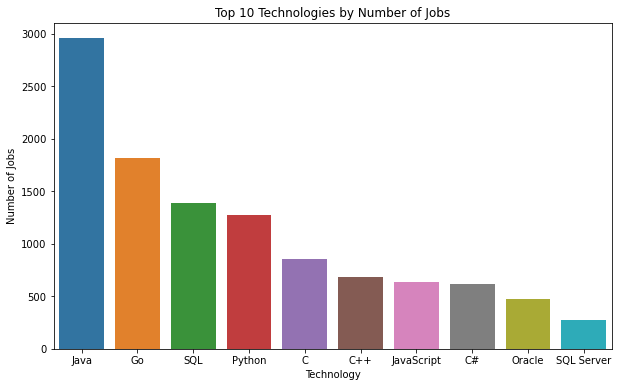

In [8]:
# create a bar plot of the top 10 technologies and their corresponding number of jobs using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x=tech_data.head(10).index, y=tech_data.head(10)['Total'])

# set the title and axis labels
plt.title('Top 10 Technologies by Number of Jobs')
plt.xlabel('Technology')
plt.ylabel('Number of Jobs')
plt.savefig("C:/Users/PROFFESSOR/Desktop/DATA ANALYTICS/IBM CAPESTONE PROJECT/SCREENSHOTS/tech_jobs.png")
# display the plot
plt.show()

# Key take aways from the graph above
- Java technology had the most number of job opportunities among all the languages
- The next three languages that followed according to job opportunities created were GO, SQL and Python

In [9]:
#function to describe data
def show_data_state(data):
    df = pd.DataFrame(index=["unique values", "dtype", "null values", "null%"])
    for col in data.columns:
        df[col] = [data[col].nunique(), data[col].dtype, data[col].isnull().sum(), f"{(data[col].isnull().sum()/data[col].shape[0]) * 100:.2f}"]
    return(df.T) 

In [10]:
show_data_state(popular_languages)

,unique values,dtype,null values,null%
Language,10,object,0,0.00
Salary,10,object,0,0.00


In [11]:
popular_languages.head()

,Language,Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"


In [12]:
#data preprocessing
popular_languages['Salary'] = popular_languages['Salary'].str.replace('$', '').str.replace(',', '').astype(int)

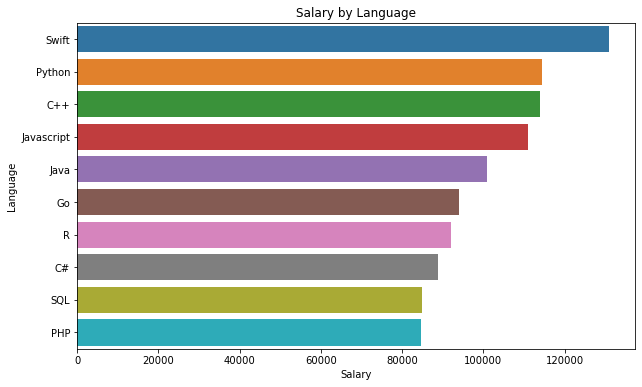

In [13]:
# sort the DataFrame by Salary column in descending order
df_sorted = popular_languages.sort_values('Salary', ascending=False).reset_index(drop=True)

# create a horizontal bar plot of the top 10 languages and their corresponding salaries using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Salary', y='Language', data=df_sorted)
# set the title and axis labels
plt.title('Salary by Language')
plt.xlabel('Salary')
plt.ylabel('Language')
plt.savefig("C:/Users/PROFFESSOR/Desktop/DATA ANALYTICS/IBM CAPESTONE PROJECT/SCREENSHOTS/salary_langauge.png")
# display the plot
plt.show()

### Key observations from the graph above
- The swift language had the highest annaul salary followed by Python, C++, Javascript, Java and then Go
- Apart from Java creating the most job opportunities, it does not top the table of the highest annual salaries but it takes the 5th position